In [1]:
pip install networkx matplotlib python-louvain

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import gzip

# Load the graph from an edges file and show the first 10 edges
def load_graph(edge_file):
    G = nx.Graph()
    first_10 = []

    with gzip.open(edge_file, "rt", encoding="utf-8") as f:   # Open as text
        for i, line in enumerate(f):
            node1, node2 = map(int, line.strip().split())     # Read user pairs
            G.add_edge(node1, node2)
            if i < 10:
                first_10.append((node1, node2))

    print("First 10 edges:")
    for edge in first_10:
        print(edge)

    return G

# Example usage
G = load_graph("facebook_combined.txt.gz")
print(f"\nGraph Loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


First 10 edges:
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(0, 5)
(0, 6)
(0, 7)
(0, 8)
(0, 9)
(0, 10)

Graph Loaded: 4039 nodes, 88234 edges


In [17]:
import community as community_louvain  # Louvain algorithm for community detection

# Function to detect communities
def detect_communities(G):
    # partition = community_louvain.best_partition(G)  # Returns a dict {node: community_id}
    partition = community_louvain.best_partition(G, random_state=42)
    return partition

# Apply the algorithm
communities = detect_communities(G)

# Print top 5 users with their community IDs
print(list(communities.items())[:5])



[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0)]


Detected community labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Total number of communities: 15


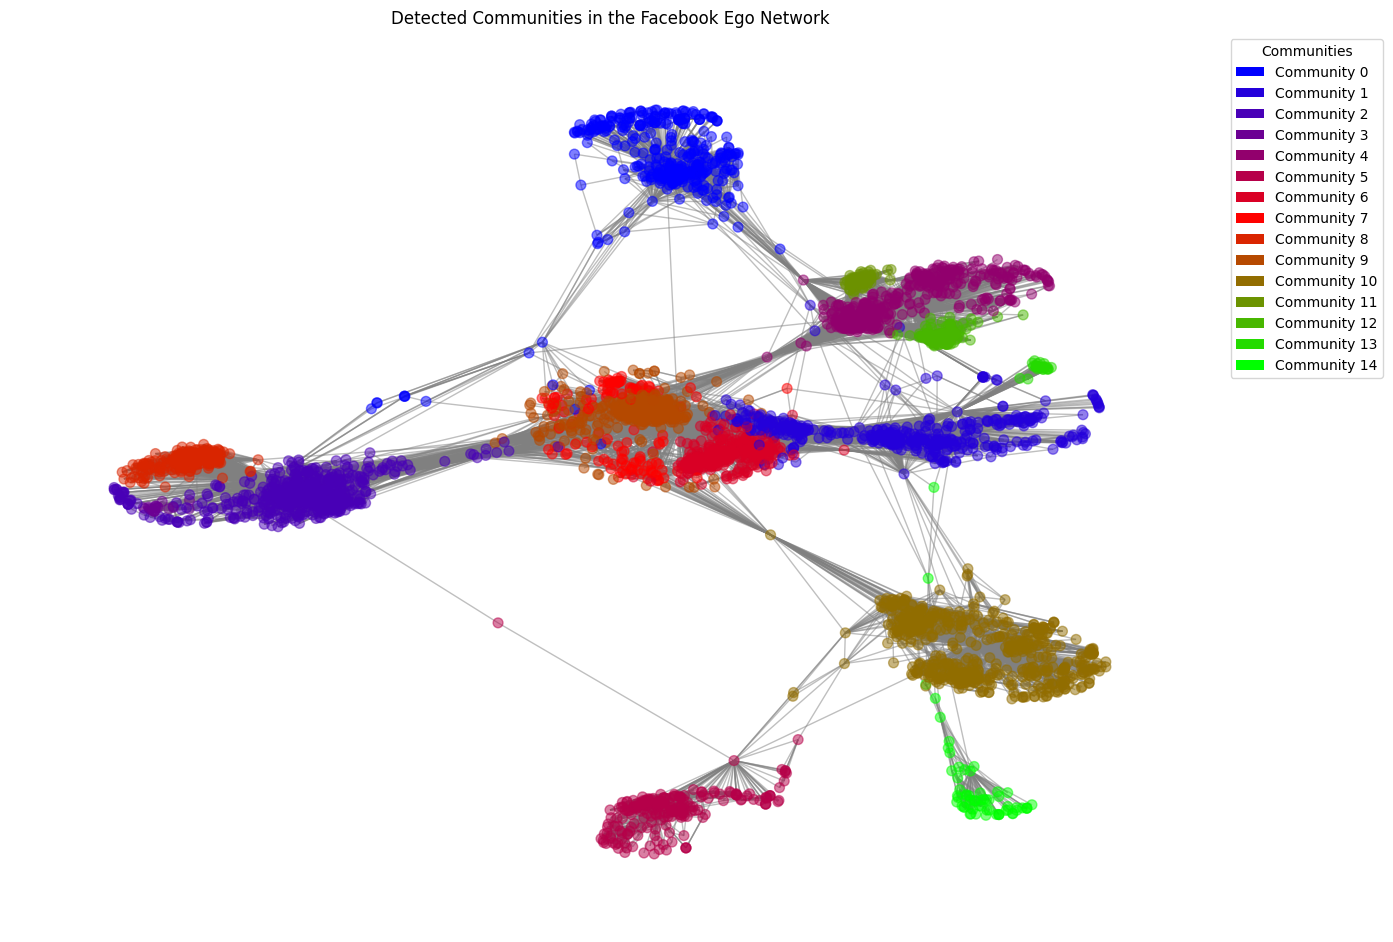

In [28]:
import random
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

def draw_communities(G, communities):
    unique_communities = sorted(set(communities.values()))
    
    # Get a colormap and generate N distinct colors
    base_cmap = plt.get_cmap('brg')  
    colors = {
        com: mcolors.to_hex(base_cmap(i / max(1, len(unique_communities) - 1)))
        for i, com in enumerate(unique_communities)
    }

    # Color nodes based on community
    node_colors = [colors[communities[node]] for node in G.nodes()]

    # Draw graph
    plt.figure(figsize=(12, 9))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(
        G,
        pos,
        node_color=node_colors,
        with_labels=False,
        node_size=50,
        edge_color="gray",
        alpha=0.5
    )

    # Create legend patches
    legend_elements = [
        Patch(facecolor=colors[com], label=f"Community {com}")
        for com in unique_communities
    ]
    plt.legend(
        handles=legend_elements,
        title="Communities",
        loc="upper right",
        bbox_to_anchor=(1.15, 1)
    )

    print("Detected community labels:", unique_communities)
    print("Total number of communities:", len(unique_communities))

    plt.title("Detected Communities in the Facebook Ego Network")
    plt.axis("off")
    plt.subplots_adjust(right=0.8)
    plt.show()
# Example usage:
draw_communities(G, communities)


In [ ]:
pip install scipy


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import networkx as nx
import community as community_louvain
import pandas as pd


G = nx.read_edgelist("facebook_combined.txt.gz", create_using=nx.Graph(), nodetype=int)

# Compute centrality measures
def compute_centrality(G):
    centrality_measures = {
        "Degree": nx.degree_centrality(G),
        "Betweenness": nx.betweenness_centrality(G),
        "Closeness": nx.closeness_centrality(G),
        "Eigenvector": nx.eigenvector_centrality(G, max_iter=1000),
        "PageRank": nx.pagerank(G)
    }
    return centrality_measures

# Get communities
communities = community_louvain.best_partition(G)

# Store centrality data
centrality_data = []
for community_id in set(communities.values()):
    subgraph_nodes = [node for node in G.nodes if communities[node] == community_id]
    subgraph = G.subgraph(subgraph_nodes)
    
    centrality = compute_centrality(subgraph)
    
    for node in subgraph_nodes:
        centrality_data.append({
            "Node": node,
            "Community": community_id,
            "Degree": centrality["Degree"].get(node, 0),
            "Betweenness": centrality["Betweenness"].get(node, 0),
            "Closeness": centrality["Closeness"].get(node, 0),
            "Eigenvector": centrality["Eigenvector"].get(node, 0),
            "PageRank": centrality["PageRank"].get(node, 0)
        })

# Convert to DataFrame for easy analysis
df = pd.DataFrame(centrality_data)

# Show top 10 influential users sorted by PageRank
df.sort_values(by="PageRank", ascending=False).head(10)


,Node,Community,Degree,Betweenness,Closeness,Eigenvector,PageRank
3755,3980,12,1.000000,0.795571,1.000000,0.469594,0.148823
0,0,0,0.979943,0.825146,0.980337,0.288830,0.073356
2892,3318,8,1.000000,0.038710,1.000000,0.265225,0.065122
2877,2670,8,1.000000,0.038710,1.000000,0.265225,0.065122
3815,1988,13,0.944444,0.037274,0.947368,0.267529,0.064803
3832,2650,13,0.944444,0.023253,0.947368,0.271609,0.064013
3819,2207,13,0.888889,0.042868,0.900000,0.248244,0.061727
3831,2622,13,0.888889,0.027651,0.900000,0.257760,0.061249
2879,2703,8,0.944444,0.017686,0.947368,0.260074,0.061163
2893,3325,8,0.944444,0.017686,0.947368,0.260074,0.061163


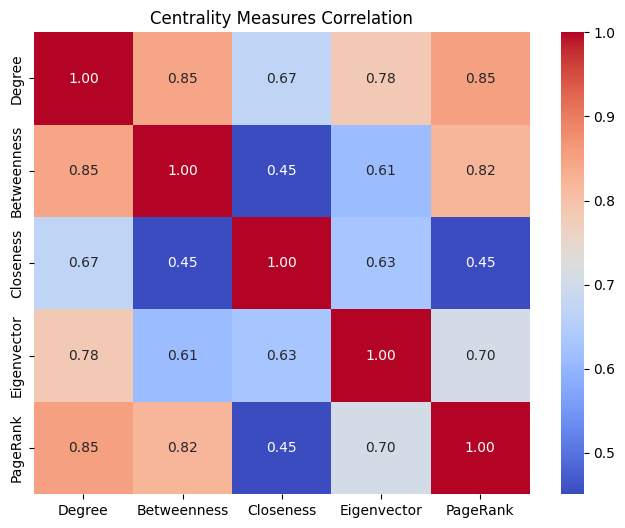

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df[["Degree", "Betweenness", "Closeness", "Eigenvector", "PageRank"]].corr(method="spearman")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Centrality Measures Correlation")
plt.show()
